data scienc end of year part 4

In [480]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# importing the data sets for alone

df_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771054555711409Alone.csv')
df_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759796290435160Alone.csv')
df_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_alone_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771082736601528Alone.csv')
df_alone_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770955999435879Alone.csv')
df_alone_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771047408504303Alone.csv')
df_alone_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759788383205274Alone.csv')
df_alone_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771061659067649Alone.csv')
df_alone_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760922573364655Alone.csv')

df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [116]:
# creating a list to rename the columns for the right hand

columns_right=('Time_r','Frame ID_r','Hand Type_r','Position X_r','Position Y_r','Position Z_r','Velocity X_r','Velocity y_r',
               'Velocity Z_r','Pitch_r','Roll_r','Yaw_r','Wrist Pos X_r','Wrist Pos X_r','Wrist Pos Y_r','Wrist Pos Z_r',
               'Elbow pos X_r','Elbow pos Y_r','Elbow pos Z_r','Grab Strenth_r','Grab Angle_r','Pinch Strength_r')

In [117]:
# changing the names for the columns in the right hand data frame

df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 
df_hand_right.head(1)

,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [118]:
# deleting rows with null values

df_alone_person1=df_alone_person1.dropna('index','any')
df_alone_person2=df_alone_person2.dropna('index','any')
df_alone_person3=df_alone_person3.dropna('index','any')
df_alone_person4=df_alone_person4.dropna('index','any')
df_alone_person5=df_alone_person5.dropna('index','any')
df_alone_person6=df_alone_person6.dropna('index','any')
df_alone_person7=df_alone_person7.dropna('index','any')
df_alone_person8=df_alone_person8.dropna('index','any')
df_alone_person9=df_alone_person9.dropna('index','any')
df_hand_right=df_hand_right.dropna('index','any')


,Time_r,Frame ID_r,Hand Type_r,Position X_r,Position Y_r,Position Z_r,Velocity X_r,Velocity y_r,Velocity Z_r,Pitch_r,...,Wrist Pos X_r,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r
0,128.2883,15478,right,1,15.67167,226.2064,20.2647,34.26665,-195.2147,-35.04302,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


In [120]:
# adding the right hand to the left
# so that on the left is the left hand and on the right is the right hand

df_alone_person1_combo=pd.concat([df_alone_person1,df_hand_right],axis=1,)
df_alone_person2_combo=pd.concat([df_alone_person2,df_hand_right],axis=1,)
df_alone_person3_combo=pd.concat([df_alone_person3,df_hand_right],axis=1,)
df_alone_person4_combo=pd.concat([df_alone_person4,df_hand_right],axis=1,)
df_alone_person5_combo=pd.concat([df_alone_person5,df_hand_right],axis=1,)
df_alone_person6_combo=pd.concat([df_alone_person6,df_hand_right],axis=1,)
df_alone_person7_combo=pd.concat([df_alone_person7,df_hand_right],axis=1,)
df_alone_person8_combo=pd.concat([df_alone_person8,df_hand_right],axis=1,)
df_alone_person9_combo=pd.concat([df_alone_person9,df_hand_right],axis=1,)

In [122]:
# makung sure that all rows it was registered 1 hand for the left and bot zero hands 

df_alone_person1_combo=df_alone_person1_combo.loc[df_alone_person1_combo[' # hands']==1]
df_alone_person2_combo=df_alone_person2_combo.loc[df_alone_person2_combo[' # hands']==1]
df_alone_person3_combo=df_alone_person3_combo.loc[df_alone_person3_combo[' # hands']==1]
df_alone_person4_combo=df_alone_person4_combo.loc[df_alone_person4_combo[' # hands']==1]
df_alone_person5_combo=df_alone_person5_combo.loc[df_alone_person5_combo[' # hands']==1]
df_alone_person6_combo=df_alone_person6_combo.loc[df_alone_person6_combo[' # hands']==1]
df_alone_person7_combo=df_alone_person7_combo.loc[df_alone_person7_combo[' # hands']==1]
df_alone_person8_combo=df_alone_person8_combo.loc[df_alone_person8_combo[' # hands']==1]
df_alone_person9_combo=df_alone_person9_combo.loc[df_alone_person9_combo[' # hands']==1]

In [123]:
# adding a laybel

df_alone_person1_combo["type"]=0
df_alone_person2_combo["type"]=0
df_alone_person3_combo["type"]=0
df_alone_person4_combo["type"]=0
df_alone_person5_combo["type"]=0
df_alone_person6_combo["type"]=0
df_alone_person7_combo["type"]=0
df_alone_person8_combo["type"]=0
df_alone_person9_combo["type"]=0

In [125]:
# setting the time as the index

df_alone_person1_combo=df_alone_person1_combo.set_index('Time')
df_alone_person2_combo=df_alone_person2_combo.set_index('Time')
df_alone_person3_combo=df_alone_person3_combo.set_index('Time')
df_alone_person4_combo=df_alone_person4_combo.set_index('Time')
df_alone_person5_combo=df_alone_person5_combo.set_index('Time')
df_alone_person6_combo=df_alone_person6_combo.set_index('Time')
df_alone_person7_combo=df_alone_person7_combo.set_index('Time')
df_alone_person8_combo=df_alone_person8_combo.set_index('Time')
df_alone_person9_combo=df_alone_person9_combo.set_index('Time')

In [126]:
# removing all rows that contain null values

df_alone_person1_combo=df_alone_person1_combo.dropna('index','any')
df_alone_person2_combo=df_alone_person2_combo.dropna('index','any')
df_alone_person3_combo=df_alone_person3_combo.dropna('index','any')
df_alone_person4_combo=df_alone_person4_combo.dropna('index','any')
df_alone_person5_combo=df_alone_person5_combo.dropna('index','any')
df_alone_person6_combo=df_alone_person6_combo.dropna('index','any')
df_alone_person7_combo=df_alone_person7_combo.dropna('index','any')
df_alone_person8_combo=df_alone_person8_combo.dropna('index','any')
df_alone_person9_combo=df_alone_person9_combo.dropna('index','any')

In [128]:
# getting rid of the 7 first secounds

df_alone_person1_combo=df_alone_person1_combo.iloc[700:]
df_alone_person2_combo=df_alone_person2_combo.iloc[700:]
df_alone_person3_combo=df_alone_person3_combo.iloc[700:]
df_alone_person4_combo=df_alone_person4_combo.iloc[700:]
df_alone_person5_combo=df_alone_person5_combo.iloc[700:]
df_alone_person6_combo=df_alone_person6_combo.iloc[700:]
df_alone_person7_combo=df_alone_person7_combo.iloc[700:]
df_alone_person8_combo=df_alone_person8_combo.iloc[700:]
df_alone_person9_combo=df_alone_person9_combo.iloc[700:]

In [129]:
# importing the data sets for sync

df_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
df_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759797397919664Sync.csv')
df_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759806131350399Sync.csv')
df_sync_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771084494502229Sync.csv')
df_sync_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957894370062Sync.csv')
df_sync_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771046527112972Sync.csv')
df_sync_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759789526313406Sync.csv')
df_sync_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771060699529085Sync.csv')
df_sync_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760923490742912Sync.csv')

In [130]:
#seperating the left hand from the right hand

df_sync_person1_r=df_sync_person1.loc[df_sync_person1[' Hand Type']=="right"]
df_sync_person1_l=df_sync_person1.loc[df_sync_person1[' Hand Type']=="left"]
df_sync_person2_r=df_sync_person2.loc[df_sync_person2[' Hand Type']=="right"]
df_sync_person2_l=df_sync_person2.loc[df_sync_person2[' Hand Type']=="left"]
df_sync_person3_r=df_sync_person3.loc[df_sync_person3[' Hand Type']=="right"]
df_sync_person3_l=df_sync_person3.loc[df_sync_person3[' Hand Type']=="left"]
df_sync_person4_r=df_sync_person4.loc[df_sync_person4[' Hand Type']=="right"]
df_sync_person4_l=df_sync_person4.loc[df_sync_person4[' Hand Type']=="left"]
df_sync_person5_r=df_sync_person5.loc[df_sync_person5[' Hand Type']=="right"]
df_sync_person5_l=df_sync_person5.loc[df_sync_person5[' Hand Type']=="left"]
df_sync_person6_r=df_sync_person6.loc[df_sync_person6[' Hand Type']=="right"]
df_sync_person6_l=df_sync_person6.loc[df_sync_person6[' Hand Type']=="left"]
df_sync_person7_r=df_sync_person7.loc[df_sync_person7[' Hand Type']=="right"]
df_sync_person7_l=df_sync_person7.loc[df_sync_person7[' Hand Type']=="left"]
df_sync_person8_r=df_sync_person8.loc[df_sync_person8[' Hand Type']=="right"]
df_sync_person8_l=df_sync_person8.loc[df_sync_person8[' Hand Type']=="left"]
df_sync_person9_r=df_sync_person9.loc[df_sync_person9[' Hand Type']=="right"]
df_sync_person9_l=df_sync_person9.loc[df_sync_person9[' Hand Type']=="left"]


In [131]:
# changing the names of the right hand columns

df_sync_person1_r=df_sync_person1_r.set_axis(columns_right, axis='columns')
df_sync_person2_r=df_sync_person2_r.set_axis(columns_right, axis='columns')
df_sync_person3_r=df_sync_person3_r.set_axis(columns_right, axis='columns')
df_sync_person4_r=df_sync_person4_r.set_axis(columns_right, axis='columns')
df_sync_person5_r=df_sync_person5_r.set_axis(columns_right, axis='columns')
df_sync_person6_r=df_sync_person6_r.set_axis(columns_right, axis='columns')
df_sync_person7_r=df_sync_person7_r.set_axis(columns_right, axis='columns')
df_sync_person8_r=df_sync_person8_r.set_axis(columns_right, axis='columns')
df_sync_person9_r=df_sync_person9_r.set_axis(columns_right, axis='columns')

In [132]:
# setting the index to the time stamp to the left and right data frames

df_sync_person1_r=df_sync_person1_r.set_index('Time_r')
df_sync_person1_l=df_sync_person1_l.set_index('Time')
df_sync_person2_r=df_sync_person2_r.set_index('Time_r')
df_sync_person2_l=df_sync_person2_l.set_index('Time')
df_sync_person3_r=df_sync_person3_r.set_index('Time_r')
df_sync_person3_l=df_sync_person3_l.set_index('Time')
df_sync_person4_r=df_sync_person4_r.set_index('Time_r')
df_sync_person4_l=df_sync_person4_l.set_index('Time')
df_sync_person5_r=df_sync_person5_r.set_index('Time_r')
df_sync_person5_l=df_sync_person5_l.set_index('Time')
df_sync_person6_r=df_sync_person6_r.set_index('Time_r')
df_sync_person6_l=df_sync_person6_l.set_index('Time')
df_sync_person7_r=df_sync_person7_r.set_index('Time_r')
df_sync_person7_l=df_sync_person7_l.set_index('Time')
df_sync_person8_r=df_sync_person8_r.set_index('Time_r')
df_sync_person8_l=df_sync_person8_l.set_index('Time')
df_sync_person9_r=df_sync_person9_r.set_index('Time_r')
df_sync_person9_l=df_sync_person9_l.set_index('Time')

In [133]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_sync_person1_combo=pd.concat([df_sync_person1_l,df_sync_person1_r],axis=1,)
df_sync_person2_combo=pd.concat([df_sync_person2_l,df_sync_person2_r],axis=1,)
df_sync_person3_combo=pd.concat([df_sync_person3_l,df_sync_person3_r],axis=1,)
df_sync_person4_combo=pd.concat([df_sync_person4_l,df_sync_person4_r],axis=1,)
df_sync_person5_combo=pd.concat([df_sync_person5_l,df_sync_person5_r],axis=1,)
df_sync_person6_combo=pd.concat([df_sync_person6_l,df_sync_person6_r],axis=1,)
df_sync_person7_combo=pd.concat([df_sync_person7_l,df_sync_person7_r],axis=1,)
df_sync_person8_combo=pd.concat([df_sync_person8_l,df_sync_person8_r],axis=1,)
df_sync_person9_combo=pd.concat([df_sync_person9_l,df_sync_person9_r],axis=1,)

In [134]:
# only keeping the rows that have two hands

df_sync_person1_combo=df_sync_person1_combo.loc[df_sync_person1_combo[' # hands']==2]
df_sync_person2_combo=df_sync_person2_combo.loc[df_sync_person2_combo[' # hands']==2]
df_sync_person3_combo=df_sync_person3_combo.loc[df_sync_person3_combo[' # hands']==2]
df_sync_person4_combo=df_sync_person4_combo.loc[df_sync_person4_combo[' # hands']==2]
df_sync_person5_combo=df_sync_person5_combo.loc[df_sync_person5_combo[' # hands']==2]
df_sync_person6_combo=df_sync_person6_combo.loc[df_sync_person6_combo[' # hands']==2]
df_sync_person7_combo=df_sync_person7_combo.loc[df_sync_person7_combo[' # hands']==2]
df_sync_person8_combo=df_sync_person8_combo.loc[df_sync_person8_combo[' # hands']==2]
df_sync_person9_combo=df_sync_person9_combo.loc[df_sync_person9_combo[' # hands']==2]

In [135]:
# adding a laybel

df_sync_person1_combo["type"]=1
df_sync_person2_combo["type"]=1
df_sync_person3_combo["type"]=1
df_sync_person4_combo["type"]=1
df_sync_person5_combo["type"]=1
df_sync_person6_combo["type"]=1
df_sync_person7_combo["type"]=1
df_sync_person8_combo["type"]=1
df_sync_person9_combo["type"]=1

In [136]:
# getting rid of the 7 first secounds

df_sync_person1_combo=df_sync_person1_combo.iloc[700:]
df_sync_person2_combo=df_sync_person2_combo.iloc[700:]
df_sync_person3_combo=df_sync_person3_combo.iloc[700:]
df_sync_person4_combo=df_sync_person4_combo.iloc[700:]
df_sync_person5_combo=df_sync_person5_combo.iloc[700:]
df_sync_person6_combo=df_sync_person6_combo.iloc[700:]
df_sync_person7_combo=df_sync_person7_combo.iloc[700:]
df_sync_person8_combo=df_sync_person8_combo.iloc[700:]
df_sync_person9_combo=df_sync_person9_combo.iloc[700:]

In [137]:
# importing the data sets for spontanius

df_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')
df_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Nofar Social_Nuero\Nofar636759795182793299Spontan.csv')
df_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Oriya Social_Nuero\Oriya636759804404113837Spontan.csv')
df_spontan_person4=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Orya Kalmanovitz\OryaB636771083605535985Spontan.csv')
df_spontan_person5=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Revital Marbel\Revital636770957038873193Spontan.csv')
df_spontan_person6=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shahar Terner\Sachar636771045591258071Spontan.csv')
df_spontan_person7=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Shelly Social_Nuero\Shelly636759787508979097Spontan.csv')
df_spontan_person8=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yael Hagai\Yael636771059544754823Spontan.csv')
df_spontan_person9=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Training\Yoel Raz\Yoel636760921663075813Spontan.csv')

In [138]:
#seperating the left hand from the right hand

df_spontan_person1_r=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="right"]
df_spontan_person1_l=df_spontan_person1.loc[df_spontan_person1[' Hand Type']=="left"]
df_spontan_person2_r=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="right"]
df_spontan_person2_l=df_spontan_person2.loc[df_spontan_person2[' Hand Type']=="left"]
df_spontan_person3_r=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="right"]
df_spontan_person3_l=df_spontan_person3.loc[df_spontan_person3[' Hand Type']=="left"]
df_spontan_person4_r=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="right"]
df_spontan_person4_l=df_spontan_person4.loc[df_spontan_person4[' Hand Type']=="left"]
df_spontan_person5_r=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="right"]
df_spontan_person5_l=df_spontan_person5.loc[df_spontan_person5[' Hand Type']=="left"]
df_spontan_person6_r=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="right"]
df_spontan_person6_l=df_spontan_person6.loc[df_spontan_person6[' Hand Type']=="left"]
df_spontan_person7_r=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="right"]
df_spontan_person7_l=df_spontan_person7.loc[df_spontan_person7[' Hand Type']=="left"]
df_spontan_person8_r=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="right"]
df_spontan_person8_l=df_spontan_person8.loc[df_spontan_person8[' Hand Type']=="left"]
df_spontan_person9_r=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="right"]
df_spontan_person9_l=df_spontan_person9.loc[df_spontan_person9[' Hand Type']=="left"]



In [139]:
# changing the names of the right hand columns

df_spontan_person1_r=df_spontan_person1_r.set_axis(columns_right, axis='columns')
df_spontan_person2_r=df_spontan_person2_r.set_axis(columns_right, axis='columns')
df_spontan_person3_r=df_spontan_person3_r.set_axis(columns_right, axis='columns')
df_spontan_person4_r=df_spontan_person4_r.set_axis(columns_right, axis='columns')
df_spontan_person5_r=df_spontan_person5_r.set_axis(columns_right, axis='columns')
df_spontan_person6_r=df_spontan_person6_r.set_axis(columns_right, axis='columns')
df_spontan_person7_r=df_spontan_person7_r.set_axis(columns_right, axis='columns')
df_spontan_person8_r=df_spontan_person8_r.set_axis(columns_right, axis='columns')
df_spontan_person9_r=df_spontan_person9_r.set_axis(columns_right, axis='columns')


In [140]:
# setting the index to the time stamp to the left and right data frames

df_spontan_person1_r=df_spontan_person1_r.set_index('Time_r')
df_spontan_person1_l=df_spontan_person1_l.set_index('Time')
df_spontan_person2_r=df_spontan_person2_r.set_index('Time_r')
df_spontan_person2_l=df_spontan_person2_l.set_index('Time')
df_spontan_person3_r=df_spontan_person3_r.set_index('Time_r')
df_spontan_person3_l=df_spontan_person3_l.set_index('Time')
df_spontan_person4_r=df_spontan_person4_r.set_index('Time_r')
df_spontan_person4_l=df_spontan_person4_l.set_index('Time')
df_spontan_person5_r=df_spontan_person5_r.set_index('Time_r')
df_spontan_person5_l=df_spontan_person5_l.set_index('Time')
df_spontan_person6_r=df_spontan_person6_r.set_index('Time_r')
df_spontan_person6_l=df_spontan_person6_l.set_index('Time')
df_spontan_person7_r=df_spontan_person7_r.set_index('Time_r')
df_spontan_person7_l=df_spontan_person7_l.set_index('Time')
df_spontan_person8_r=df_spontan_person8_r.set_index('Time_r')
df_spontan_person8_l=df_spontan_person8_l.set_index('Time')
df_spontan_person9_r=df_spontan_person9_r.set_index('Time_r')
df_spontan_person9_l=df_spontan_person9_l.set_index('Time')

In [141]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_spontan_person1_combo=pd.concat([df_spontan_person1_l,df_spontan_person1_r],axis=1,)
df_spontan_person2_combo=pd.concat([df_spontan_person2_l,df_spontan_person2_r],axis=1,)
df_spontan_person3_combo=pd.concat([df_spontan_person3_l,df_spontan_person3_r],axis=1,)
df_spontan_person4_combo=pd.concat([df_spontan_person4_l,df_spontan_person4_r],axis=1,)
df_spontan_person5_combo=pd.concat([df_spontan_person5_l,df_spontan_person5_r],axis=1,)
df_spontan_person6_combo=pd.concat([df_spontan_person6_l,df_spontan_person6_r],axis=1,)
df_spontan_person7_combo=pd.concat([df_spontan_person7_l,df_spontan_person7_r],axis=1,)
df_spontan_person8_combo=pd.concat([df_spontan_person8_l,df_spontan_person8_r],axis=1,)
df_spontan_person9_combo=pd.concat([df_spontan_person9_l,df_spontan_person9_r],axis=1,)


In [142]:
# only keeping the rows that have two hands

df_spontan_person1_combo=df_spontan_person1_combo.loc[df_spontan_person1_combo[' # hands']==2]
df_spontan_person2_combo=df_spontan_person2_combo.loc[df_spontan_person2_combo[' # hands']==2]
df_spontan_person3_combo=df_spontan_person3_combo.loc[df_spontan_person3_combo[' # hands']==2]
df_spontan_person4_combo=df_spontan_person4_combo.loc[df_spontan_person4_combo[' # hands']==2]
df_spontan_person5_combo=df_spontan_person5_combo.loc[df_spontan_person5_combo[' # hands']==2]
df_spontan_person6_combo=df_spontan_person6_combo.loc[df_spontan_person6_combo[' # hands']==2]
df_spontan_person7_combo=df_spontan_person7_combo.loc[df_spontan_person7_combo[' # hands']==2]
df_spontan_person8_combo=df_spontan_person8_combo.loc[df_spontan_person8_combo[' # hands']==2]
df_spontan_person9_combo=df_spontan_person9_combo.loc[df_spontan_person9_combo[' # hands']==2]

In [143]:
# adding a laybel

df_spontan_person1_combo["type"]=2
df_spontan_person2_combo["type"]=2
df_spontan_person3_combo["type"]=2
df_spontan_person4_combo["type"]=2
df_spontan_person5_combo["type"]=2
df_spontan_person6_combo["type"]=2
df_spontan_person7_combo["type"]=2
df_spontan_person8_combo["type"]=2
df_spontan_person9_combo["type"]=2

In [144]:
# getting rid of the 7 first secounds

df_spontan_person1_combo=df_spontan_person1_combo.iloc[700:]
df_spontan_person2_combo=df_spontan_person2_combo.iloc[700:]
df_spontan_person3_combo=df_spontan_person3_combo.iloc[700:]
df_spontan_person4_combo=df_spontan_person4_combo.iloc[700:]
df_spontan_person5_combo=df_spontan_person5_combo.iloc[700:]
df_spontan_person6_combo=df_spontan_person6_combo.iloc[700:]
df_spontan_person7_combo=df_spontan_person7_combo.iloc[700:]
df_spontan_person8_combo=df_spontan_person8_combo.iloc[700:]
df_spontan_person9_combo=df_spontan_person9_combo.iloc[700:]


In [148]:
# combinig all the data frames of alone together

data1=pd.concat([df_alone_person1_combo,df_alone_person2_combo,df_alone_person3_combo,df_alone_person4_combo,
                 df_alone_person5_combo,df_alone_person6_combo,df_alone_person7_combo,df_alone_person8_combo,
                df_alone_person9_combo],axis=0)
data1=data1.drop(['Time_r'], axis=1)
data1.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 26638 entries, 530.4075 to 764.5913
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         26638 non-null  float64
 1    Hand Type        26638 non-null  object 
 2    # hands          26638 non-null  float64
 3    Position X       26638 non-null  float64
 4    Position Y       26638 non-null  float64
 5    Position Z       26638 non-null  float64
 6    Velocity X       26638 non-null  float64
 7    Velocity Y       26638 non-null  float64
 8    Velocity Z       26638 non-null  float64
 9    Pitch            26638 non-null  float64
 10   Roll             26638 non-null  float64
 11   Yaw              26638 non-null  float64
 12   Wrist Pos X      26638 non-null  float64
 13   Wrist Pos Y      26638 non-null  float64
 14   Wrist Pos Z      26638 non-null  float64
 15   Elbow pos X      26638 non-null  float64
 16   Elbow Pos Y      26638 non-

In [149]:
# combinig all the data frames of sync together

data2=pd.concat([df_sync_person1_combo,df_sync_person2_combo,df_sync_person3_combo,df_sync_person4_combo,df_sync_person5_combo,
                 df_sync_person5_combo,df_sync_person6_combo,df_sync_person7_combo,df_sync_person8_combo,
                df_sync_person9_combo],axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 34590 entries, 438.8282 to 856.3295
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         34590 non-null  float64
 1    Hand Type        34590 non-null  object 
 2    # hands          34590 non-null  float64
 3    Position X       34590 non-null  float64
 4    Position Y       34590 non-null  float64
 5    Position Z       34590 non-null  float64
 6    Velocity X       34590 non-null  float64
 7    Velocity Y       34590 non-null  float64
 8    Velocity Z       34590 non-null  float64
 9    Pitch            34590 non-null  float64
 10   Roll             34590 non-null  float64
 11   Yaw              34590 non-null  float64
 12   Wrist Pos X      34590 non-null  float64
 13   Wrist Pos Y      34590 non-null  float64
 14   Wrist Pos Z      34590 non-null  float64
 15   Elbow pos X      34590 non-null  float64
 16   Elbow Pos Y      34590 non-

In [150]:
# combinig all the data frames of spontan together

data3=pd.concat([df_spontan_person1_combo,df_spontan_person2_combo,df_spontan_person3_combo,df_spontan_person4_combo,
                 df_spontan_person5_combo,df_spontan_person6_combo,df_spontan_person7_combo,df_spontan_person8_combo,
                 df_spontan_person9_combo],axis=0)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 31355 entries, 347.5953 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         31355 non-null  float64
 1    Hand Type        31355 non-null  object 
 2    # hands          31355 non-null  float64
 3    Position X       31355 non-null  float64
 4    Position Y       31355 non-null  float64
 5    Position Z       31355 non-null  float64
 6    Velocity X       31355 non-null  float64
 7    Velocity Y       31355 non-null  float64
 8    Velocity Z       31355 non-null  float64
 9    Pitch            31355 non-null  float64
 10   Roll             31355 non-null  float64
 11   Yaw              31355 non-null  float64
 12   Wrist Pos X      31355 non-null  float64
 13   Wrist Pos Y      31355 non-null  float64
 14   Wrist Pos Z      31355 non-null  float64
 15   Elbow pos X      31355 non-null  float64
 16   Elbow Pos Y      31355 non-n

In [151]:
# combinig the 3 combined data frames together

data=pd.concat([data1,data2,data3],axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 92583 entries, 530.4075 to 673.556
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         92583 non-null  float64
 1    Hand Type        92583 non-null  object 
 2    # hands          92583 non-null  float64
 3    Position X       92583 non-null  float64
 4    Position Y       92583 non-null  float64
 5    Position Z       92583 non-null  float64
 6    Velocity X       92583 non-null  float64
 7    Velocity Y       92583 non-null  float64
 8    Velocity Z       92583 non-null  float64
 9    Pitch            92583 non-null  float64
 10   Roll             92583 non-null  float64
 11   Yaw              92583 non-null  float64
 12   Wrist Pos X      92583 non-null  float64
 13   Wrist Pos Y      92583 non-null  float64
 14   Wrist Pos Z      92583 non-null  float64
 15   Elbow pos X      92583 non-null  float64
 16   Elbow Pos Y      92583 non-n

In [152]:
data

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,left,1.0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,left,1.0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,left,1.0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,left,1.0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,left,1.0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,left,2.0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,left,2.0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,left,2.0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,left,2.0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [153]:
# getting rid of the column number of hands because each row has 2 hands

data=data.drop([' # hands'],axis=1)

# changing the hand type, 0=left hand, 1=right hand

data[" Hand Type"]=0
data["Hand Type_r"]=1
data

<ipython-input-153-5b80b42c08ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[" Hand Type"]=0
<ipython-input-153-5b80b42c08ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hand Type_r"]=1


,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.44440,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.00870,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.42210,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.61020,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.18000,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673.4224,52505.0,0,-93.01819,221.5837,37.95346,93.66040,-705.10900,-58.95358,1.390923,1.208312,...,198.77440,148.9755,36.17215,429.8078,88.65751,136.2759,0.0,0.256132,0.0,2
673.4561,52509.0,0,-87.87977,207.0944,30.25084,161.30820,-332.78340,-239.55220,1.268201,1.078444,...,198.76460,147.6285,30.82009,424.2537,67.32506,129.2876,0.0,0.275538,0.0,2
673.4894,52512.0,0,-81.66566,203.9826,24.04028,240.80950,-160.56200,-222.44420,1.124147,0.938394,...,199.40050,147.6265,27.94176,413.8865,47.81111,132.7705,0.0,0.342347,0.0,2
673.5233,52516.0,0,-77.57621,198.9182,20.57973,127.00290,-218.65710,-80.40309,1.037299,0.911163,...,200.46510,148.9561,25.42753,400.5782,31.01108,139.2796,0.0,0.448368,0.0,2


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 92583 entries, 530.4075 to 673.556
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         92583 non-null  float64
 1    Hand Type        92583 non-null  int64  
 2    Position X       92583 non-null  float64
 3    Position Y       92583 non-null  float64
 4    Position Z       92583 non-null  float64
 5    Velocity X       92583 non-null  float64
 6    Velocity Y       92583 non-null  float64
 7    Velocity Z       92583 non-null  float64
 8    Pitch            92583 non-null  float64
 9    Roll             92583 non-null  float64
 10   Yaw              92583 non-null  float64
 11   Wrist Pos X      92583 non-null  float64
 12   Wrist Pos Y      92583 non-null  float64
 13   Wrist Pos Z      92583 non-null  float64
 14   Elbow pos X      92583 non-null  float64
 15   Elbow Pos Y      92583 non-null  float64
 16   Elbow Pos Z      92583 non-n

In [478]:
data.head()

,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
530.4075,150957.0,0,-62.14016,176.4449,27.85700,162.50850,419.4444,-59.98780,1.958783,0.267320,...,39.77090,197.3047,99.29434,171.1660,52.26681,287.7588,0.0,0.498644,0.0,0
530.4240,150959.0,0,-59.53389,182.9531,26.70363,165.68980,414.0087,-55.57027,1.957630,0.271045,...,44.53930,202.0048,101.27940,172.6115,51.28829,287.5629,0.0,0.520795,0.0,0
530.4407,150961.0,0,-57.38616,190.9170,25.55918,119.61220,426.4221,-76.86320,1.957033,0.272688,...,48.87646,204.2281,103.38490,173.7377,52.08905,290.6891,0.0,0.527123,0.0,0
530.4572,150963.0,0,-56.21503,198.0746,24.11986,82.99512,353.6102,-96.85542,1.968468,0.253811,...,53.62828,206.4552,105.76730,174.1449,50.32234,292.6303,0.0,0.504663,0.0,0
530.4738,150965.0,0,-54.58284,203.6519,22.74486,48.61330,404.1800,-72.40993,1.982430,0.240629,...,58.09599,208.3566,108.21800,175.0809,48.86516,294.4880,0.0,0.515524,0.0,0


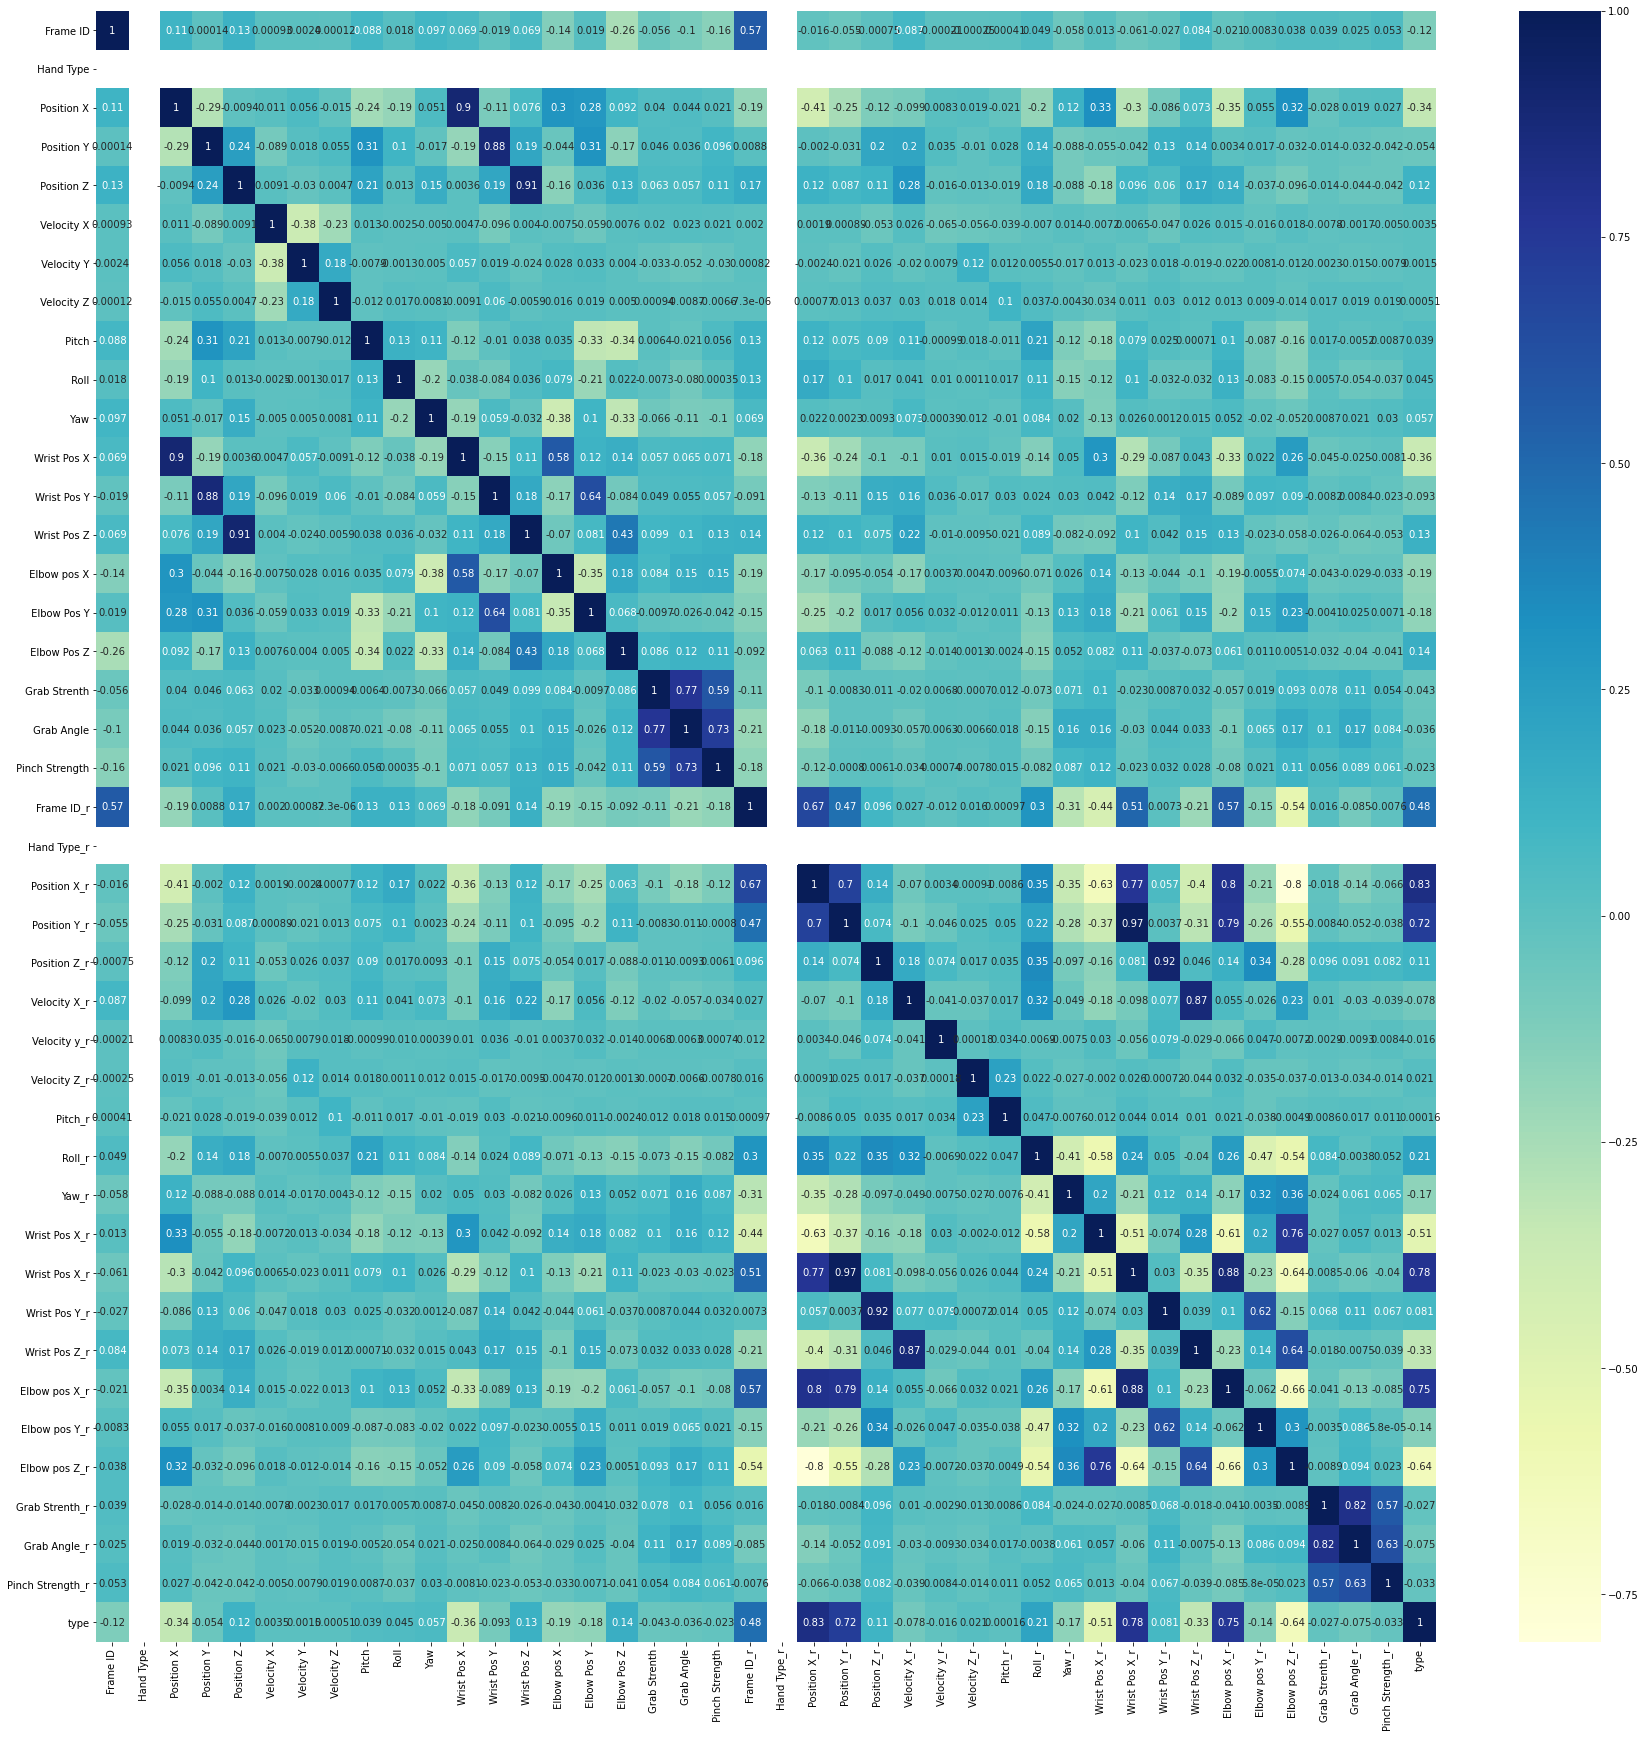

In [490]:
# corallation matrix between all of the columns

plt.figure(figsize=(30,30))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu",annot=True)
plt.show()

In [155]:
# splitting the data
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [156]:
# changing the data to numpy array so that i can see the pictures, and split the data 

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

# dividing the data to x,y

train_set_x=train_set[:,0:41]
train_set_y=train_set[:,41]
test_set_x=test_set[:,0:41]
test_set_y=test_set[:,41]

In [157]:
# function to represent the confussion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(4,3))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Purples')

## KNN

In [434]:
for x in range (3,100):
    knn1 = KNeighborsClassifier(n_neighbors=x)
    knn1.fit(train_set_x, train_set_y)
    y_pred_knn1=knn1.predict(test_set_x)
    accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
    if(accuracy_knn1>0.98):
        print(x, accuracy_knn1)

3 0.9998379867149106
4 0.9998379867149106
5 0.9996219690014582
6 0.999567964573095
7 0.9994059512880056
8 0.9991899335745531
9 0.9991899335745531
10 0.9988119025760113
11 0.9988659070043744
12 0.9985958848625587
13 0.9984338715774693
14 0.9981638494356537
15 0.9978938272938381
16 0.9977318140087487
17 0.9976238051520224
18 0.9974617918669331
19 0.9975157962952962
20 0.9972457741534806
21 0.9970297564400281
22 0.9971917697251175
23 0.9970837608683912
24 0.9969217475833019
25 0.9968137387265755
26 0.9967597342982124
27 0.9964357077280337
28 0.9964357077280337
29 0.9962196900145812
30 0.9958956634444024
31 0.9956256413025868
32 0.9953016147324081
33 0.9950855970189556
34 0.9948155748771399
35 0.994869579305503
36 0.9942215261651456
37 0.9942215261651456
38 0.9937354863098774
39 0.9937354863098774
40 0.9934114597396987
41 0.9933034508829724
42 0.9928714154560674
43 0.9930334287411567
44 0.9926553977426149
45 0.9924933844575256
46 0.9920613490306205
47 0.9921693578873467
48 0.99184533131716

In [441]:
# 4 neighbors has the highest result
knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(train_set_x, train_set_y)
y_pred_knn1=knn1.predict(test_set_x)
accuracy_knn1=metrics.accuracy_score(test_set_y, y_pred_knn1)
accuracy_knn1

0.9998379867149106

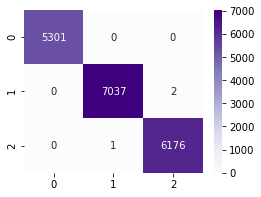

In [442]:
mat_knn1=confusion_matrix(test_set_y, y_pred_knn1)
confussion_matrix(mat_knn1)

In [443]:
print("precision_score_knn:",precision_score(test_set_y, y_pred_knn1,average='weighted')) 
print("recall_score_knn:",recall_score(test_set_y, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(test_set_y, y_pred_knn1,average='weighted'))

precision_score_knn: 0.9998379965244661
recall_score_knn: 0.9998379867149106
f1_score_knn: 0.9998379875169597


In [444]:
cv_scores_knn1=cross_val_score(knn1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.99945997 0.99966246 0.99945993 0.99945993 0.99932492] mean: 0.9994734427871425


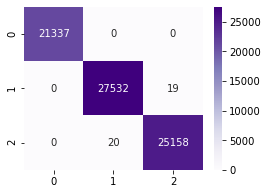

In [445]:
y_pred_knn1_c = cross_val_predict(knn1,  train_set_x, train_set_y, cv=5)
cofussion_knn1=confusion_matrix(train_set_y, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [446]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_knn1_c,average='weighted'))

precision_score: 0.9994734422169833
recall_score: 0.999473442605244
f1_score: 0.9994734421547297


In [451]:
# 61 neighbors is the last one with over 99% in the training
knn2 = KNeighborsClassifier(n_neighbors=61)
knn2.fit(train_set_x, train_set_y)
y_pred_knn2=knn2.predict(test_set_x)
accuracy_knn2=metrics.accuracy_score(test_set_y, y_pred_knn2)
accuracy_knn2

0.9902251984662742

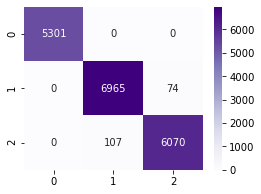

In [452]:
mat_knn2=confusion_matrix(test_set_y, y_pred_knn2)
confussion_matrix(mat_knn2)

In [453]:
print("precision_score_knn:",precision_score(test_set_y, y_pred_knn2,average='weighted')) 
print("recall_score_knn:",recall_score(test_set_y, y_pred_knn2,average='weighted'))
print("f1_score_knn:",f1_score(test_set_y, y_pred_knn2,average='weighted'))

precision_score_knn: 0.9902306978478654
recall_score_knn: 0.9902251984662742
f1_score_knn: 0.9902235379575027


In [454]:
cv_scores_knn2=cross_val_score(knn2, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.98643175 0.98751097 0.98872612 0.98805104 0.98791602] mean: 0.987727179750844


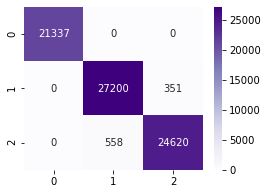

In [455]:
y_pred_knn2_c = cross_val_predict(knn2,  train_set_x, train_set_y, cv=5)
cofussion_knn2=confusion_matrix(train_set_y, y_pred_knn2_c)
confussion_matrix(cofussion_knn2)

In [456]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_knn2_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_knn2_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_knn2_c,average='weighted'))

precision_score: 0.9877440596705539
recall_score: 0.9877271622606865
f1_score: 0.9877247991886547


## XG

In [46]:
arr=np.arange(450,500,5)
arr

array([450, 455, 460, 465, 470, 475, 480, 485, 490, 495])

In [47]:
a=0
for x in arr:
    XG1=XGBClassifier(n_estimators=x, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
    XG1.fit(train_set_x, train_set_y)
    y_pred_XG1=XG1.predict(test_set_x)
    accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
    if (accuracy_XG1>a):
        a=accuracy_XG1
        print( x, a)
    else:
        print(x)

450 0.9997839822865475
455
460
465 0.9998919911432738
470
475
480
485
490
495


In [48]:
XG1=XGBClassifier(n_estimators=465, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss") 
XG1.fit(train_set_x, train_set_y)
y_pred_XG1=XG1.predict(test_set_x)
accuracy_XG1=metrics.accuracy_score(test_set_y, y_pred_XG1)
accuracy_XG1

0.9998919911432738

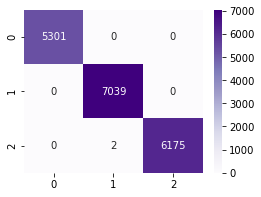

In [49]:
mat_XG1=confusion_matrix(test_set_y, y_pred_XG1)
confussion_matrix(mat_XG1)

In [50]:
print("precision_score_XG:",precision_score(test_set_y, y_pred_XG1,average='weighted')) 
print("recall_score_XG:",recall_score(test_set_y, y_pred_XG1,average='weighted'))
print("f1_score_XG:",f1_score(test_set_y, y_pred_XG1,average='weighted'))

precision_score_XG: 0.99989202182325
recall_score_XG: 0.9998919911432738
f1_score_XG: 0.999891990070117


In [51]:
# cross validation
cv_scores_XG1=cross_val_score(XG1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.99986499 0.99993249 1.         1.         0.99986498] mean: 0.9999324935530604


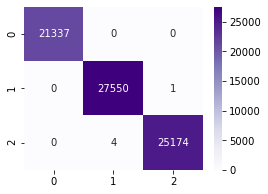

In [52]:
y_pred_XG1_c = cross_val_predict(XG1,  train_set_x, train_set_y, cv=5)
cofussion_XG1=confusion_matrix(train_set_y, y_pred_XG1_c)
confussion_matrix(cofussion_XG1)

In [80]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_XG1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_XG1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_XG1_c,average='weighted'))

precision_score: 0.9999324969127888
recall_score: 0.9999324926416979
f1_score: 0.9999324924682765


## Random Forest

In [54]:
forest1= RandomForestClassifier(random_state=42)
forest1.fit(train_set_x, train_set_y)
y_pred_forest1=forest1.predict(test_set_x)
accuracy_forest1=metrics.accuracy_score(test_set_y, y_pred_forest1)
accuracy_forest1

1.0

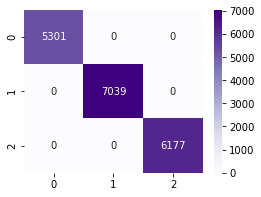

In [57]:
mat_forest1=confusion_matrix(test_set_y, y_pred_forest1)
confussion_matrix(mat_forest1)

In [56]:
print("precision_score_forest:",precision_score(test_set_y, y_pred_forest1,average='weighted')) 
print("recall_score_forset:",recall_score(test_set_y, y_pred_forest1,average='weighted'))
print("f1_score_forest:",f1_score(test_set_y, y_pred_forest1,average='weighted'))

precision_score_forest: 1.0
recall_score_forset: 1.0
f1_score_forest: 1.0


In [58]:
# cross validation
cv_scores_forest1=cross_val_score(forest1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_forest1, "mean:", np.mean(cv_scores_forest1))

[1.         1.         0.99993249 0.99993249 1.        ] mean: 0.9999729966920947


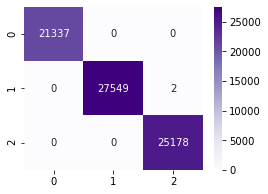

In [59]:
y_pred_forest1_c = cross_val_predict(forest1,  train_set_x, train_set_y, cv=5)
cofussion_forest1=confusion_matrix(train_set_y, y_pred_forest1_c)
confussion_matrix(cofussion_forest1)

In [81]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_forest1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_forest1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_forest1_c,average='weighted'))

precision_score: 0.9999729992014723
recall_score: 0.9999729970566792
f1_score: 0.9999729971028272


## Logistic Regression

In [470]:
lr1=LogisticRegression(random_state=9)
lr1.fit(train_set_x, train_set_y)
y_pred_lr1=lr1.predict(test_set_x)
accuracy_lr1=metrics.accuracy_score(test_set_y, y_pred_lr1)
accuracy_lr1

0.8252956742452882

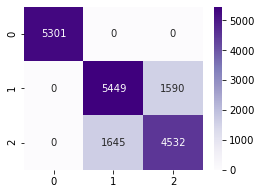

In [471]:
mat_lr1=confusion_matrix(test_set_y, y_pred_lr1)
confussion_matrix(mat_lr1)

In [472]:
print("precision_score_lr:",precision_score(test_set_y, y_pred_lr1,average='weighted')) 
print("recall_score_lr:",recall_score(test_set_y, y_pred_lr1,average='weighted'))
print("f1_score_lr:",f1_score(test_set_y, y_pred_lr1,average='weighted'))

precision_score_lr: 0.8252130036192517
recall_score_lr: 0.8252956742452882
f1_score_lr: 0.8252449831677464


In [473]:
# cross validation
cv_scores_lr1=cross_val_score(lr1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_lr1, "mean:", np.mean(cv_scores_lr1))

[0.83299581 0.82994667 0.8277189  0.83372713 0.83575238] mean: 0.8320281780083066


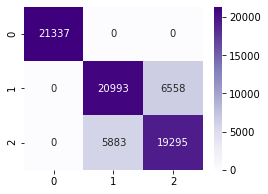

In [474]:
y_pred_lr1_c = cross_val_predict(lr1,  train_set_x, train_set_y, cv=5)
cofussion_lr1=confusion_matrix(train_set_y, y_pred_lr1_c)
confussion_matrix(cofussion_lr1)

In [475]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_lr1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_lr1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_lr1_c,average='weighted'))

precision_score: 0.8323450742653038
recall_score: 0.8320281910728269
f1_score: 0.832097506416743


## Voting Classifier

In [500]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('xg1',XG1),('forest1',forest1),('lr1',lr1)], voting='hard')
vote1.fit(train_set_x, train_set_y)
y_pred_vote1=vote1.predict(test_set_x)
accuracy_vote1=metrics.accuracy_score(test_set_y, y_pred_vote1)
accuracy_vote1

0.9998919911432738

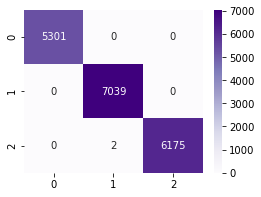

In [501]:
mat_vote1=confusion_matrix(test_set_y, y_pred_vote1)
confussion_matrix(mat_vote1)

In [502]:
print("precision_score_vote:",precision_score(test_set_y, y_pred_vote1,average='weighted')) 
print("recall_score_vote:",recall_score(test_set_y, y_pred_vote1,average='weighted'))
print("f1_score_vote:",f1_score(test_set_y, y_pred_vote1,average='weighted'))

precision_score_vote: 0.99989202182325
recall_score_vote: 0.9998919911432738
f1_score_vote: 0.999891990070117


In [503]:
# cross validation
cv_scores_vote1=cross_val_score(vote1, train_set_x, train_set_y, cv=5, scoring="accuracy")
print(cv_scores_vote1, "mean:", np.mean(cv_scores_vote1))

[0.99966248 1.         0.99986498 0.99986498 0.99986498] mean: 0.9998514863635801


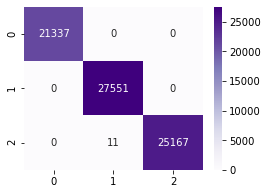

In [505]:
y_pred_vote1_c = cross_val_predict(vote1,  train_set_x, train_set_y, cv=5)
cofussion_vote1=confusion_matrix(train_set_y, y_pred_vote1_c)
confussion_matrix(cofussion_vote1)

In [506]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(train_set_y, y_pred_vote1_c,average='weighted')) 
print("recall_score:",recall_score(train_set_y, y_pred_vote1_c,average='weighted'))
print("f1_score:",f1_score(train_set_y, y_pred_vote1_c,average='weighted'))

precision_score: 0.9998515430845775
recall_score: 0.9998514838117355
f1_score: 0.9998514824080743


## test data

In [373]:
# importing the test data for alone

df_test_alone_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770942529041679Alone.csv')
df_test_alone_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771066407626524Alone.csv')
df_test_alone_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754669540564461Alone.csv')
      
df_hand_right=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\HandRight.csv')

In [450]:
# changing the names for the columns in the right hand data frame

df_hand_right=df_hand_right.set_axis(columns_right, axis='columns') 

In [376]:
# deleting rows with null values

df_test_alone_person1=df_test_alone_person1.dropna('index','any')
df_test_alone_person2=df_test_alone_person2.dropna('index','any')
df_test_alone_person3=df_test_alone_person3.dropna('index','any')

In [378]:
# adding the right hand to the left

df_test_alone_person1_combo=pd.concat([df_test_alone_person1,df_hand_right],axis=1,)
df_test_alone_person2_combo=pd.concat([df_test_alone_person2,df_hand_right],axis=1,)
df_test_alone_person3_combo=pd.concat([df_test_alone_person3,df_hand_right],axis=1,)

In [382]:
# adding a laybel

df_test_alone_person1_combo["type"]=0
df_test_alone_person2_combo["type"]=0
df_test_alone_person3_combo["type"]=0

In [384]:
# setting the index to the time stamp

df_test_alone_person1_combo=df_test_alone_person1_combo.set_index('Time')
df_test_alone_person2_combo=df_test_alone_person2_combo.set_index('Time')
df_test_alone_person3_combo=df_test_alone_person3_combo.set_index('Time')

In [385]:
# getting rid of any rows with nulls

df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')
df_test_alone_person1_combo=df_test_alone_person1_combo.dropna('index','any')

In [387]:
# getting rid of the 7 first secounds

df_test_alone_person1_combo=df_test_alone_person1_combo.iloc[700:]
df_test_alone_person2_combo=df_test_alone_person2_combo.iloc[700:]
df_test_alone_person3_combo=df_test_alone_person3_combo.iloc[700:]

In [388]:
# importing the test data for sync

df_test_sync_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770941638547912Sync.csv')
df_test_sync_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771065531910215Sync.csv')
df_test_sync_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754671560850581Sync.csv')

In [390]:
# seperating the left hand from the right hand

df_test_sync_person1_r=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="right"]
df_test_sync_person2_r=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="right"]
df_test_sync_person3_r=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="right"]
df_test_sync_person1_l=df_test_sync_person1.loc[df_test_sync_person1[' Hand Type']=="left"]
df_test_sync_person2_l=df_test_sync_person2.loc[df_test_sync_person2[' Hand Type']=="left"]
df_test_sync_person3_l=df_test_sync_person3.loc[df_test_sync_person3[' Hand Type']=="left"]

In [392]:
# changing the names for the columns in the right hand data frame

df_test_sync_person1_r=df_test_sync_person1_r.set_axis(columns_right, axis='columns')
df_test_sync_person2_r=df_test_sync_person2_r.set_axis(columns_right, axis='columns')
df_test_sync_person3_r=df_test_sync_person3_r.set_axis(columns_right, axis='columns')

In [394]:
# setting the index to the time stamp

df_test_sync_person1_r=df_test_sync_person1_r.set_index('Time_r')
df_test_sync_person2_r=df_test_sync_person2_r.set_index('Time_r')
df_test_sync_person3_r=df_test_sync_person3_r.set_index('Time_r')
df_test_sync_person1_l=df_test_sync_person1_l.set_index('Time')
df_test_sync_person2_l=df_test_sync_person2_l.set_index('Time')
df_test_sync_person3_l=df_test_sync_person3_l.set_index('Time')

In [397]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_test_sync_person1_combo=pd.concat([df_test_sync_person1_l,df_test_sync_person1_r],axis=1)
df_test_sync_person2_combo=pd.concat([df_test_sync_person2_l,df_test_sync_person2_r],axis=1)
df_test_sync_person3_combo=pd.concat([df_test_sync_person3_l,df_test_sync_person3_r],axis=1)

In [399]:
# only keeping the rows that have two hands

df_test_sync_person1_combo=df_test_sync_person1_combo.loc[df_test_sync_person1_combo[' # hands']==2]
df_test_sync_person2_combo=df_test_sync_person2_combo.loc[df_test_sync_person2_combo[' # hands']==2]
df_test_sync_person3_combo=df_test_sync_person3_combo.loc[df_test_sync_person3_combo[' # hands']==2]

In [400]:
# adding a laybel

df_test_sync_person1_combo["type"]=1
df_test_sync_person2_combo["type"]=1
df_test_sync_person3_combo["type"]=1

<ipython-input-400-5c3ea82e2d35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_sync_person3_combo["type"]=1


In [401]:
# getting rid of the 7 first secounds

df_test_sync_person1_combo=df_test_sync_person1_combo.iloc[700:]
df_test_sync_person2_combo=df_test_sync_person2_combo.iloc[700:]
df_test_sync_person3_combo=df_test_sync_person3_combo.iloc[700:]

In [402]:
# importing the test data for spontan

df_test_spontan_person1=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Itiel Lab\Itiel636770940701219076Spontan.csv')
df_test_spontan_person2=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Mor SHerman\Mor636771064635567065Spontan.csv')
df_test_spontan_person3=pd.read_csv(r'C:\Users\nechd\Desktop\data_science_part4\extraFiles\Validation\Oded Medina\Oded636754670490266956Spontan.csv')

In [404]:
# seperating the left hand from the right hand

df_test_spontan_person1_r=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="right"]
df_test_spontan_person2_r=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="right"]
df_test_spontan_person3_r=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="right"]
df_test_spontan_person1_l=df_test_spontan_person1.loc[df_test_spontan_person1[' Hand Type']=="left"]
df_test_spontan_person2_l=df_test_spontan_person2.loc[df_test_spontan_person2[' Hand Type']=="left"]
df_test_spontan_person3_l=df_test_spontan_person3.loc[df_test_spontan_person3[' Hand Type']=="left"]

In [406]:
# changing the names for the columns in the right hand data frame

df_test_spontan_person1_r=df_test_spontan_person1_r.set_axis(columns_right,axis='columns')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_axis(columns_right,axis='columns')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_axis(columns_right,axis='columns')

In [408]:
# setting the index to the time stamp

df_test_spontan_person1_r=df_test_spontan_person1_r.set_index('Time_r')
df_test_spontan_person2_r=df_test_spontan_person2_r.set_index('Time_r')
df_test_spontan_person3_r=df_test_spontan_person3_r.set_index('Time_r')
df_test_spontan_person1_l=df_test_spontan_person1_l.set_index('Time')
df_test_spontan_person2_l=df_test_spontan_person2_l.set_index('Time')
df_test_spontan_person3_l=df_test_spontan_person3_l.set_index('Time')

In [409]:
# combing the left and right back together so that they are in 1 row by the time stamp
# the left hand is on the left and the right hand is on the right

df_test_spontan_person1_combo=pd.concat([df_test_spontan_person1_l,df_test_spontan_person1_r],axis=1)
df_test_spontan_person2_combo=pd.concat([df_test_spontan_person2_l,df_test_spontan_person2_r],axis=1)
df_test_spontan_person3_combo=pd.concat([df_test_spontan_person3_l,df_test_spontan_person3_r],axis=1)

In [410]:
# only keeping the rows that have two hands

df_test_spontan_person1_combo=df_test_spontan_person1_combo.loc[df_test_spontan_person1_combo[" # hands"]==2]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.loc[df_test_spontan_person2_combo[" # hands"]==2]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.loc[df_test_spontan_person3_combo[" # hands"]==2]

In [411]:
# adding a laybel

df_test_spontan_person1_combo["type"]=2
df_test_spontan_person2_combo["type"]=2
df_test_spontan_person3_combo["type"]=2

In [412]:
# getting rid of the 7 first secounds

df_test_spontan_person1_combo=df_test_spontan_person1_combo.iloc[700:]
df_test_spontan_person2_combo=df_test_spontan_person2_combo.iloc[700:]
df_test_spontan_person3_combo=df_test_spontan_person3_combo.iloc[700:]

In [413]:
# combining each type of data togeter into new data frames

data_test1=pd.concat([df_test_alone_person1_combo,df_test_alone_person1_combo,df_test_alone_person1_combo],axis=0)
data_test2=pd.concat([df_test_sync_person1_combo,df_test_sync_person2_combo,df_test_sync_person3_combo],axis=0)
data_test3=pd.concat([df_test_spontan_person1_combo,df_test_spontan_person2_combo,df_test_spontan_person3_combo],axis=0)

In [414]:
# getting rid of the column "Time_r" in the alone data frame (the others dont have that column)

data_test1=data_test1.drop(['Time_r'],axis=1)
data_test1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11184 entries, 966.6613 to 1025.529
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         11184 non-null  float64
 1    Hand Type        11184 non-null  object 
 2    # hands          11184 non-null  float64
 3    Position X       11184 non-null  float64
 4    Position Y       11184 non-null  float64
 5    Position Z       11184 non-null  float64
 6    Velocity X       11184 non-null  float64
 7    Velocity Y       11184 non-null  float64
 8    Velocity Z       11184 non-null  float64
 9    Pitch            11184 non-null  float64
 10   Roll             11184 non-null  float64
 11   Yaw              11184 non-null  float64
 12   Wrist Pos X      11184 non-null  float64
 13   Wrist Pos Y      11184 non-null  float64
 14   Wrist Pos Z      11184 non-null  float64
 15   Elbow pos X      11184 non-null  float64
 16   Elbow Pos Y      11184 non-

In [415]:
# combining the 3 data frames into 1 data frame

data_test=pd.concat([data_test1,data_test2,data_test3],axis=0)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  object 
 2    # hands          29153 non-null  float64
 3    Position X       29153 non-null  float64
 4    Position Y       29153 non-null  float64
 5    Position Z       29153 non-null  float64
 6    Velocity X       29153 non-null  float64
 7    Velocity Y       29153 non-null  float64
 8    Velocity Z       29153 non-null  float64
 9    Pitch            29153 non-null  float64
 10   Roll             29153 non-null  float64
 11   Yaw              29153 non-null  float64
 12   Wrist Pos X      29153 non-null  float64
 13   Wrist Pos Y      29153 non-null  float64
 14   Wrist Pos Z      29153 non-null  float64
 15   Elbow pos X      29153 non-null  float64
 16   Elbow Pos Y      29153 non-

In [416]:
data_test

,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,left,1.0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,left,1.0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,left,1.0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,left,1.0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,left,1.0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,left,2.0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,left,2.0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,left,2.0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,left,2.0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [417]:
# dropping the column with "# hands" because all rows have 2 hands

data_test=data_test.drop([' # hands'],axis=1)

# changing the hand type, 0=left hand, 1=right hand

data_test[" Hand Type"]=0
data_test["Hand Type_r"]=1
data_test

<ipython-input-417-a32d2a800cf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[" Hand Type"]=0
<ipython-input-417-a32d2a800cf0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Hand Type_r"]=1


,Frame ID,Hand Type,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,Roll,...,Wrist Pos X_r,Wrist Pos Y_r,Wrist Pos Z_r,Elbow pos X_r,Elbow pos Y_r,Elbow pos Z_r,Grab Strenth_r,Grab Angle_r,Pinch Strength_r,type
966.6613,112701.0,0,-89.46551,282.5517,104.14670,59.477310,-222.84010,114.072300,2.621086,-0.292849,...,39.77090,197.3047,99.29434,171.1660,52.266810,287.7588,0.0,0.498644,0.0,0
966.6778,112703.0,0,-89.09656,278.4751,105.77440,-13.318180,-215.47790,72.303980,2.666370,-0.231436,...,44.53930,202.0048,101.27940,172.6115,51.288290,287.5629,0.0,0.520795,0.0,0
966.6948,112705.0,0,-88.56313,274.1503,106.46620,54.813290,-279.77750,22.959880,2.720711,-0.178354,...,48.87646,204.2281,103.38490,173.7377,52.089050,290.6891,0.0,0.527123,0.0,0
966.7109,112707.0,0,-88.37968,270.0990,107.01780,8.587542,-235.26190,21.513070,2.800939,-0.122899,...,53.62828,206.4552,105.76730,174.1449,50.322340,292.6303,0.0,0.504663,0.0,0
966.7275,112709.0,0,-89.64819,267.5950,106.91000,-70.051510,-158.77360,-12.247460,2.951404,-0.102620,...,58.09599,208.3566,108.21800,175.0809,48.865160,294.4880,0.0,0.515524,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891.7161,58577.0,0,-119.09390,266.9509,90.19492,20.516860,-54.38897,-79.527550,0.935100,0.581712,...,259.14380,214.1489,81.66591,357.1292,-23.849340,117.5243,0.0,0.000000,0.0,2
891.7498,58580.0,0,-119.68230,265.0744,88.75297,-31.678680,-38.33282,-30.122560,0.929250,0.578519,...,263.39370,219.1755,90.31033,364.5702,-18.458120,118.9476,0.0,0.039183,0.0,2
891.7819,58583.0,0,-120.50570,263.0826,88.22878,-21.621920,-62.06139,-9.631733,0.933446,0.582374,...,270.16560,225.3236,100.75550,377.3418,-11.117420,112.1917,0.0,0.070024,0.0,2
891.8161,58585.0,0,-121.26820,261.9093,88.43225,-38.911430,-56.67702,15.780990,0.933015,0.586312,...,272.78680,227.7773,106.85620,384.1153,-6.891727,114.2839,0.0,0.104950,0.0,2


In [418]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 29153 entries, 966.6613 to 891.8492
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    Frame ID         29153 non-null  float64
 1    Hand Type        29153 non-null  int64  
 2    Position X       29153 non-null  float64
 3    Position Y       29153 non-null  float64
 4    Position Z       29153 non-null  float64
 5    Velocity X       29153 non-null  float64
 6    Velocity Y       29153 non-null  float64
 7    Velocity Z       29153 non-null  float64
 8    Pitch            29153 non-null  float64
 9    Roll             29153 non-null  float64
 10   Yaw              29153 non-null  float64
 11   Wrist Pos X      29153 non-null  float64
 12   Wrist Pos Y      29153 non-null  float64
 13   Wrist Pos Z      29153 non-null  float64
 14   Elbow pos X      29153 non-null  float64
 15   Elbow Pos Y      29153 non-null  float64
 16   Elbow Pos Z      29153 non-

In [421]:
# changing the data to numpy array so that i can see split the data 

data_test=np.array(data_test,dtype='float32')

# dividing into x y

data_test_x=data_test[:,0:41]
data_test_y=data_test[:,41]

## KNN

In [447]:
y_pred_knn1_test=knn1.predict(data_test_x)
accuracy_knn1_test=metrics.accuracy_score(data_test_y,y_pred_knn1_test)
accuracy_knn1_test

0.6724522347614311

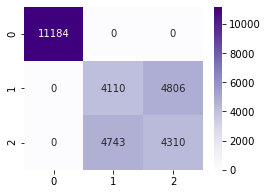

In [448]:
mat_knn1_test=confusion_matrix(data_test_y,y_pred_knn1_test)
confussion_matrix(mat_knn1_test)

In [449]:
print("precision_score_knn:",precision_score(data_test_y, y_pred_knn1_test,average='weighted')) 
print("recall_score_knn:",recall_score(data_test_y, y_pred_knn1_test,average='weighted'))
print("f1_score_knn:",f1_score(data_test_y, y_pred_knn1_test,average='weighted'))

precision_score_knn: 0.6724337674424334
recall_score_knn: 0.6724522347614311
f1_score_knn: 0.6724394512202873


In [457]:
y_pred_knn2_test=knn2.predict(data_test_x)
accuracy_knn2_test=metrics.accuracy_score(data_test_y,y_pred_knn2_test)
accuracy_knn2_test

0.6741673241175865

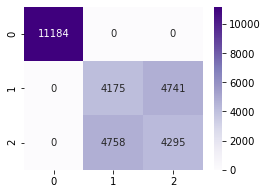

In [458]:
mat_knn2_test=confusion_matrix(data_test_y,y_pred_knn2_test)
confussion_matrix(mat_knn2_test)

In [459]:
print("precision_score_knn:",precision_score(data_test_y, y_pred_knn2_test,average='weighted')) 
print("recall_score_knn:",recall_score(data_test_y, y_pred_knn2_test,average='weighted'))
print("f1_score_knn:",f1_score(data_test_y, y_pred_knn2_test,average='weighted'))

precision_score_knn: 0.6741719616095256
recall_score_knn: 0.6741673241175865
f1_score_knn: 0.6741693828331805


## XG

In [427]:
y_pred_xg1_test=XG1.predict(data_test_x)
accuracy_xg1_test=metrics.accuracy_score(data_test_y,y_pred_xg1_test)
accuracy_xg1_test

0.7102528041710973

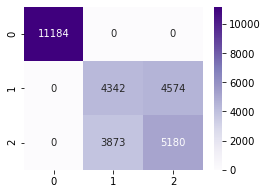

In [428]:
mat_xg1_test=confusion_matrix(data_test_y,y_pred_xg1_test)
confussion_matrix(mat_xg1_test)

In [430]:
print("precision_score_xg:",precision_score(data_test_y, y_pred_xg1_test,average='weighted')) 
print("recall_score_xg:",recall_score(data_test_y, y_pred_xg1_test,average='weighted'))
print("f1_score_xg:",f1_score(data_test_y, y_pred_xg1_test,average='weighted'))

precision_score_xg: 0.7101922373932142
recall_score_xg: 0.7102528041710973
f1_score_xg: 0.7097245060835766


## random forest

In [431]:
y_pred_forest1_test=forest1.predict(data_test_x)
accuracy_forest1_test=metrics.accuracy_score(data_test_y,y_pred_forest1_test)
accuracy_forest1_test

0.71646142764038

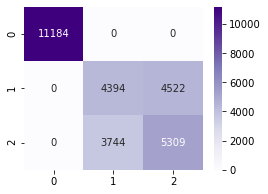

In [432]:
mat_forest1_test=confusion_matrix(data_test_y,y_pred_forest1_test)
confussion_matrix(mat_forest1_test)

In [433]:
print("precision_score_forest:",precision_score(data_test_y, y_pred_forest1_test,average='weighted')) 
print("recall_score_forest:",recall_score(data_test_y, y_pred_forest1_test,average='weighted'))
print("f1_score_forest:",f1_score(data_test_y, y_pred_forest1_test,average='weighted'))

precision_score_forest: 0.7164590166298529
recall_score_forest: 0.71646142764038
f1_score_forest: 0.7158346801711613


## logistic regression

In [491]:
y_pred_lr1_test=lr1.predict(data_test_x)
accuracy_lr1_test=metrics.accuracy_score(data_test_y,y_pred_lr1_test)
accuracy_lr1_test

0.7805371659863479

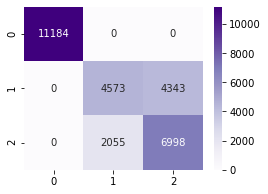

In [492]:
mat_lr1_test=confusion_matrix(data_test_y,y_pred_lr1_test)
confussion_matrix(mat_lr1_test)

In [493]:
print("precision_score_lr:",precision_score(data_test_y, y_pred_lr1_test,average='weighted')) 
print("recall_score_lr:",recall_score(data_test_y, y_pred_lr1_test,average='weighted'))
print("f1_score_lr:",f1_score(data_test_y, y_pred_lr1_test,average='weighted'))

precision_score_lr: 0.7862584256351134
recall_score_lr: 0.7805371659863479
f1_score_lr: 0.7766959958509294


In [507]:
y_pred_vote1_test=vote1.predict(data_test_x)
accuracy_vote1_test=metrics.accuracy_score(data_test_y,y_pred_vote1_test)
accuracy_vote1_test

0.7169073508729805

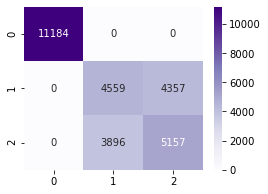

In [508]:
mat_vote1_test=confusion_matrix(data_test_y,y_pred_vote1_test)
confussion_matrix(mat_vote1_test)

In [509]:
print("precision_score_vote:",precision_score(data_test_y, y_pred_vote1_test,average='weighted')) 
print("recall_score_vote:",recall_score(data_test_y, y_pred_vote1_test,average='weighted'))
print("f1_score_vote:",f1_score(data_test_y, y_pred_vote1_test,average='weighted'))

precision_score_vote: 0.7168625090423111
recall_score_vote: 0.7169073508729805
f1_score_vote: 0.716665379413406


# The best result i got is 78% using logistic regression!

### It classified the alone 1005 coreect and had trouble classifiying the sych and spontan.